In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from pydataset import data

In [2]:
iris_df = data('iris')

In [4]:
iris_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
iris_df = iris_df.rename(columns={"Sepal.Length": "sepal_length",
                        "Sepal.Width": "sepal_width",
                        "Petal.Length": "petal_length",
                        "Petal.Width": "petal_width",
                        "Species": "species"})

In [9]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
X = iris_df[['petal_length', 'sepal_length']]

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
iris_df['cluster'] = kmeans.predict(X)

In [14]:
kmeans.cluster_centers_

array([[4.39310345, 5.87413793],
       [1.49215686, 5.00784314],
       [5.67804878, 6.83902439]])

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,sepal_length
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


In [16]:
iris_df.groupby('cluster')['petal_length', 'sepal_length'].mean()

,petal_length,sepal_length
cluster,,
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


Text(0.5, 1.0, 'Visualizing Cluster Centers')

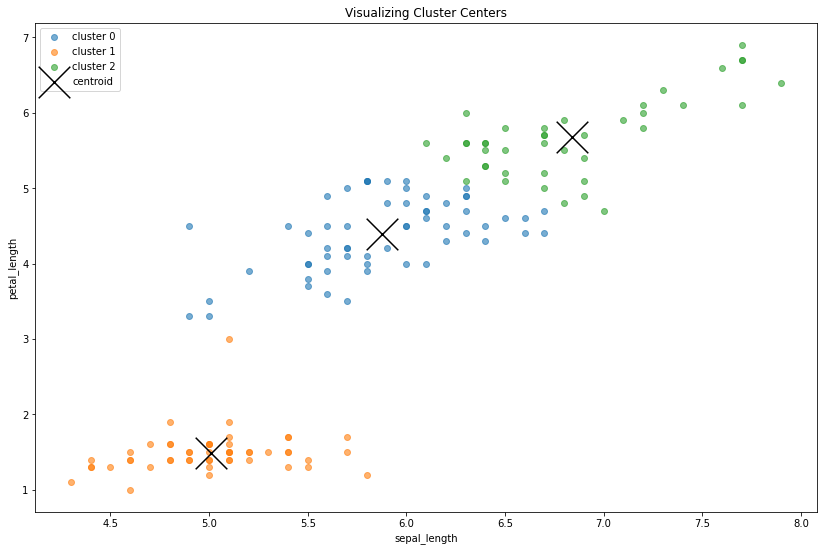

In [17]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

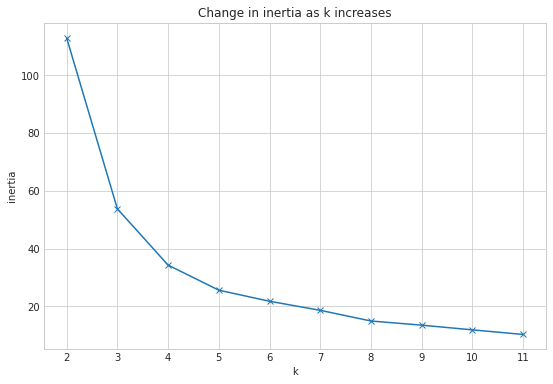

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

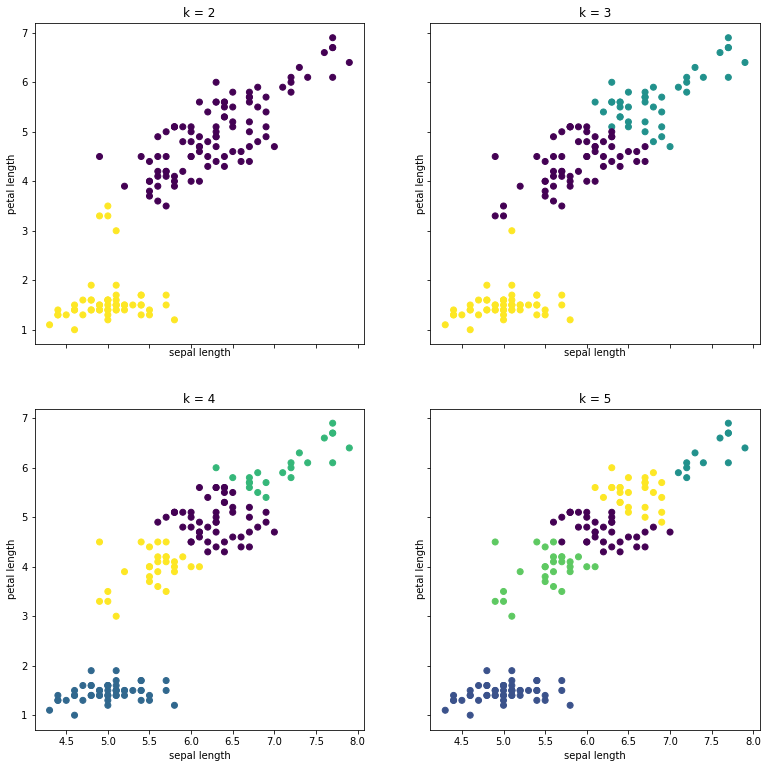

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')